# Ljung-Box Q-Test

## Introduction
In this notebook, we will extend our previous analysis of autocorrelation in financial time series by incorporating the Ljung-Box Q-test. The Ljung-Box Q-test is a statistical test that checks whether any of a group of autocorrelations of a time series are different from zero. This is particularly useful for identifying serial dependencies in stock returns, which has implications for market efficiency and trading strategies.

## 1. Importing Necessary Libraries

In [7]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox

## 2. Obtaining the Financial Asset Data

Let's choose an asset for analysis. In this case, we will use Apple Inc. (AAPL).

In [2]:
# Define the asset ticker
ticker = 'AAPL'

# Download the adjusted closing prices of the asset
prices = yf.download(ticker)['Adj Close'].tz_localize(None)

# View the last few rows of the data
prices.tail()

[*********************100%***********************]  1 of 1 completed


,Adj Close
Date,
2024-09-10,220.110001
2024-09-11,222.660004
2024-09-12,222.770004
2024-09-13,222.500000
2024-09-16,215.929993


## 3. Calculating Daily Returns
To analyze autocorrelation, we will calculate the daily returns of the asset.

In [11]:
# Calculate daily returns
returns = prices.pct_change().dropna()

# View the first few rows of the returns
returns.head()

,Adj Close
Date,
1980-12-15,-0.053581
1980-12-16,-0.076231
1980-12-17,0.024450
1980-12-18,0.028580
1980-12-19,0.059238


## 4. Autocorrelation Analysis Over Different Time Periods
We will analyze the autocorrelation of returns over the last 12 months, 6 months, and 3 months.

First, we will define the time periods.

In [4]:
# Get the current date
end_date = returns.index.max()

# Define periods
periods = {
    'Last 12 Months': end_date - pd.DateOffset(months=12),
    'Last 6 Months': end_date - pd.DateOffset(months=6),
    'Last 3 Months': end_date - pd.DateOffset(months=3)
}

### 4.1. Plotting the Autocorrelation Function
We will plot the autocorrelation functions for each period in subplots.

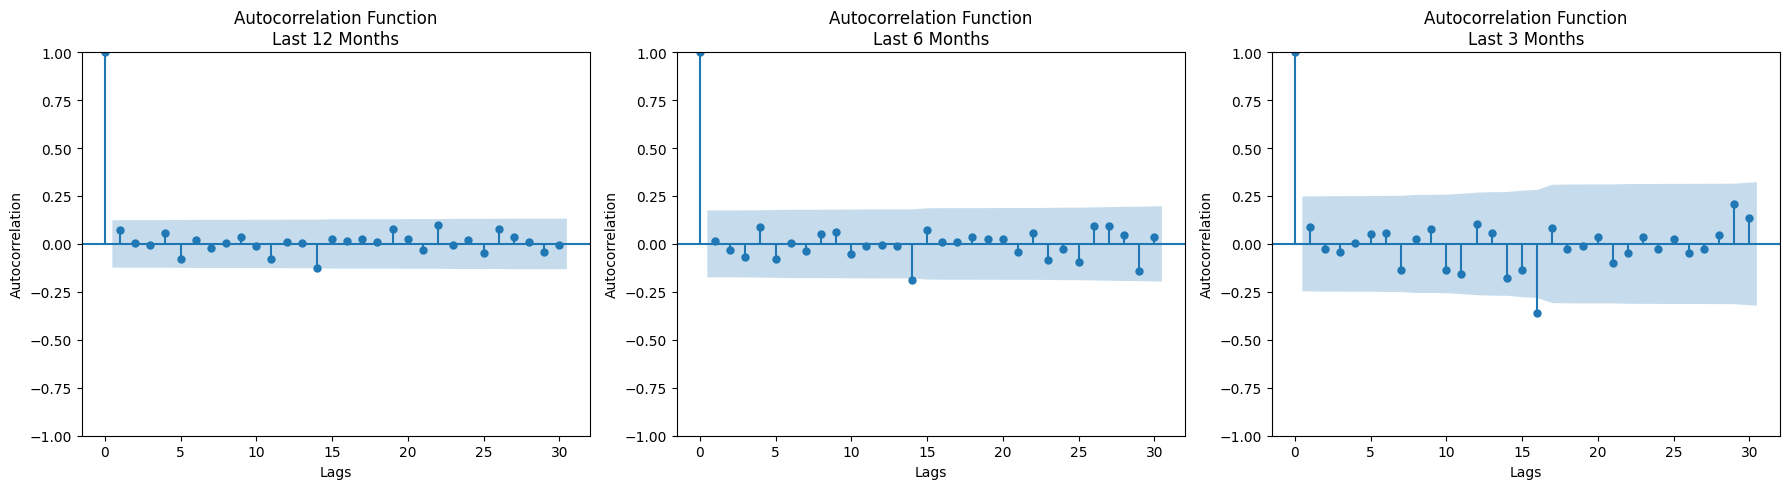

In [5]:
# Define the number of lags
num_lags = 30

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Iterate over periods and axes
for ax, (title, start_date) in zip(axes, periods.items()):
    # Slice the returns for the given period
    period_returns = returns.loc[start_date:end_date]

    # Plot the autocorrelation function
    plot_acf(period_returns, lags=num_lags, ax=ax)
    ax.set_title(f'Autocorrelation Function\n{title}')
    ax.set_xlabel('Lags')
    ax.set_ylabel('Autocorrelation')

plt.tight_layout()
plt.show()

## 5. Ljung-Box Q-Test
The Ljung-Box Q-test helps determine whether a series of autocorrelations are jointly zero.

### 5.1. Performing the Ljung-Box Q-Test
We will perform the Ljung-Box Q-test for each period and interpret the results.

In [8]:
# Initialize a dictionary to hold the test results
ljung_box_results = {}

# Significance level
alpha = 0.05

# Perform Ljung-Box Q-Test for each period
for title, start_date in periods.items():
    # Slice the returns for the given period
    period_returns = returns.loc[start_date:end_date]

    # Perform the Ljung-Box test
    lb_test = acorr_ljungbox(period_returns, lags=num_lags, return_df=True)

    # Add to the dictionary
    ljung_box_results[title] = lb_test

    # Display the results
    print(f"Ljung-Box Q-Test Results for {title}:\n")
    print(lb_test)
    print("\n")

Ljung-Box Q-Test Results for Last 12 Months:

      lb_stat  lb_pvalue
1    1.255442   0.262516
2    1.262044   0.532048
3    1.275729   0.734904
4    2.073704   0.722205
5    3.723870   0.589816
6    3.857364   0.695972
7    3.969060   0.783334
8    3.972504   0.859596
9    4.287177   0.891515
10   4.319925   0.931763
11   5.862491   0.882380
12   5.882599   0.921884
13   5.888432   0.950119
14  10.142760   0.751673
15  10.336815   0.798036
16  10.398155   0.845025
17  10.569320   0.878057
18  10.605445   0.910344
19  12.249693   0.874677
20  12.431012   0.900443
21  12.697382   0.918853
22  15.438628   0.842737
23  15.454347   0.877614
24  15.571233   0.902927
25  16.226624   0.907913
26  17.833362   0.881752
27  18.251718   0.895638
28  18.286643   0.918699
29  18.772169   0.926991
30  18.778554   0.944523


Ljung-Box Q-Test Results for Last 6 Months:

      lb_stat  lb_pvalue
1    0.040216   0.841060
2    0.173442   0.916933
3    0.745851   0.862370
4    1.740690   0.783314
5    2.

### 5.2. Interpreting the Results
For each lag, if the p-value is less than the significance level (0.05), we reject the null hypothesis that there is no autocorrelation up to that lag.

In [10]:
# Interpret the results
for title, lb_test in ljung_box_results.items():
    print(f"Interpretation for {title}:\n")
    for lag in range(1, num_lags + 1):
        p_value = lb_test['lb_pvalue'].iloc[lag - 1]
        if p_value < alpha:
            print(f"At lag {lag}, p-value = {p_value:.4f} < {alpha}, reject null hypothesis of no autocorrelation.")
        else:
            print(f"At lag {lag}, p-value = {p_value:.4f} >= {alpha}, fail to reject null hypothesis.")
    print("\n")

Interpretation for Last 12 Months:

At lag 1, p-value = 0.2625 >= 0.05, fail to reject null hypothesis.
At lag 2, p-value = 0.5320 >= 0.05, fail to reject null hypothesis.
At lag 3, p-value = 0.7349 >= 0.05, fail to reject null hypothesis.
At lag 4, p-value = 0.7222 >= 0.05, fail to reject null hypothesis.
At lag 5, p-value = 0.5898 >= 0.05, fail to reject null hypothesis.
At lag 6, p-value = 0.6960 >= 0.05, fail to reject null hypothesis.
At lag 7, p-value = 0.7833 >= 0.05, fail to reject null hypothesis.
At lag 8, p-value = 0.8596 >= 0.05, fail to reject null hypothesis.
At lag 9, p-value = 0.8915 >= 0.05, fail to reject null hypothesis.
At lag 10, p-value = 0.9318 >= 0.05, fail to reject null hypothesis.
At lag 11, p-value = 0.8824 >= 0.05, fail to reject null hypothesis.
At lag 12, p-value = 0.9219 >= 0.05, fail to reject null hypothesis.
At lag 13, p-value = 0.9501 >= 0.05, fail to reject null hypothesis.
At lag 14, p-value = 0.7517 >= 0.05, fail to reject null hypothesis.
At lag 